In [130]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import os
import random as rd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [4]:
def shuffle_array(arr):
    for i in range(100):
        alea1 = int(rd.random()*arr.shape[0])
        alea2 = int(rd.random()*arr.shape[0])
        temp = arr[alea1].copy()
        arr[alea1] = arr[alea2]
        arr[alea2] = temp
    print("array shuffled")
    return arr

def create_train_test(X_monet, X_manet, split):
    nb = int(X_monet.shape[0]*(1-split))
    
    X_monet_train = X_monet[0:nb]
    X_manet_train = X_manet[0:nb]

    X_monet_test = X_monet[nb:]
    X_manet_test = X_manet[nb:]
    print("train and test arrays created")
    return X_monet_train, X_manet_train, X_monet_test, X_manet_test

In [5]:
def inspecter_im(path, place):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()

In [14]:
def creer_histo(path, couleur, place):
    img = mpimg.imread(path)
    
    x = np.asarray([i for i in range(256)])
    y_r = np.zeros((256)).astype(float)
    y_g = np.zeros((256)).astype(float)
    y_b = np.zeros((256)).astype(float)
    somme = img.shape[0]*img.shape[1]

    for i in img:
        for j in i:
            y_r[j[0]] += 1
            y_g[j[1]] += 1
            y_b[j[2]] += 1
    
    y_r /= somme
    y_g /= somme
    y_b /= somme
    
    if couleur == 'r':
        y = y_r
        titre = 'Répartiton rouge'
        coul = 'red'
    elif couleur == 'g':
        y = y_g
        titre = 'Répartition vert'
        coul = 'green'
    elif couleur == 'b':
        y = y_b
        titre = 'répartition bleu'
        coul = 'blue'
    plt.bar(x, y, color = coul)
    plt.title(titre, loc='center', fontsize=8)
    plt.savefig("output/mon_man/histo" + str(place) + ".png")

In [7]:
def create_X_manet():
    
    print("Creating X_manet...")
    
    X_manet = []

    path = "data/manet"
    manet = os.listdir(path)
    compte = 1

    for toile in manet:
        print(str(compte) + "/" + str(len(manet) - 1), toile, end = '           \r')
        if toile[-4:] == '.jpg':
            # Lecture de l'image et transformation en tenseur
            img = mpimg.imread(path + "/" + toile)

            # Création x
            r = np.zeros((256)).astype(int)
            g = np.zeros((256)).astype(int)
            b = np.zeros((256)).astype(int)
            somme = img.shape[0]*img.shape[1]*img.shape[2]

            for i in img:
                for j in i:
                    r[j[0]] += 1
                    g[j[1]] += 1
                    b[j[2]] += 1

            x = np.concatenate((r, g, b)) / somme
            x = np.append(x, 0)
            X_manet.append(x)
            compte += 1
    X_manet = np.asarray(X_manet)
    print("X_manet created             ")
    return X_manet

In [8]:
def create_X_monet():
    print("Creating X_monet...")
    X_monet = []

    path = "data/monet"
    monet = os.listdir(path)
    compte = 1

    for i in range(263):
        toile = monet[i]
        print(str(compte) + "/" + str(262), toile, end = '           \r')
        if toile[-4:] == '.jpg':
            # Lecture de l'image et transformation en tenseur
            img = mpimg.imread(path + "/" + toile)

            # Création x
            r = np.zeros((256)).astype(int)
            g = np.zeros((256)).astype(int)
            b = np.zeros((256)).astype(int)
            somme = img.shape[0]*img.shape[1]*img.shape[2]

            for i in img:
                for j in i:
                    r[j[0]] += 1
                    g[j[1]] += 1
                    b[j[2]] += 1

            x = np.concatenate((r, g, b)) / somme
            x = np.append(x, 1)
            X_monet.append(x)
            compte += 1
    X_monet = np.asarray(X_monet)
    print("X_monet created              ")
    return X_monet

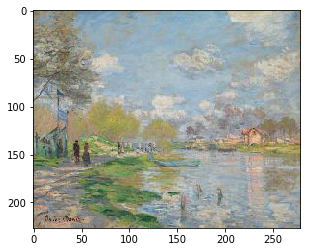

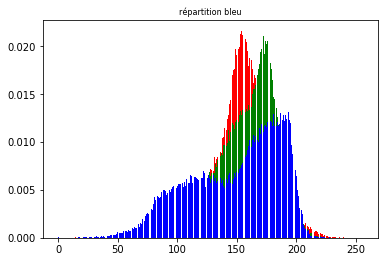

In [15]:
inspecter_im('data/monet/monet23.jpg', 0)
creer_histo('data/monet/monet23.jpg', 'r', 0)
creer_histo('data/monet/monet23.jpg', 'g', 1)
creer_histo('data/monet/monet23.jpg', 'b', 2)
plt.savefig("output/mon_man/histo" + str(3) + ".png")

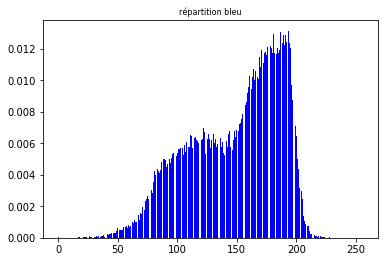

In [17]:
creer_histo('data/monet/monet23.jpg', 'b', 2)

In [18]:
X_monet = create_X_monet()
X_manet = create_X_manet()

Creating X_monet...
X_monet created                
Creating X_manet...
X_manet created                


array shuffled
array shuffled
train and test arrays created


In [82]:
print(X_manet.shape)
print(X_monet.shape)
print(X_manet_train.shape)
print(X_monet_train.shape)
print(X_manet_test.shape)
print(X_monet_test.shape)
print(X_train.shape)
print(X_test.shape)

(262, 769)
(262, 769)
(248, 769)
(248, 769)
(14, 769)
(14, 769)
(496, 769)
(28, 769)


In [172]:
scores_train = []
scores_test = []
split = 0.5
for i in range(30):
    X_monet = shuffle_array(X_monet)
    X_manet = shuffle_array(X_manet)

    X_monet_train, X_manet_train, X_monet_test, X_manet_test = create_train_test(X_monet, X_manet, split)
    X_train = np.concatenate((X_manet_train, X_monet_train))
    X_test = np.concatenate((X_manet_test, X_monet_test))

    kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto', verbose = 0)
    X = X_train[:,:-1]
    y = X_train[:,-1]

    kmeans.fit(X)

    labels = kmeans.labels_
    train_score = sum(y==labels)/len(y)
    if train_score < 0.5:
        train_score = 1 - train_score
    scores_train.append(train_score)
    print("train : ", train_score)

    X = X_test[:,:-1]
    y = X_test[:,-1]

    correct = 0
    for i in range(len(X)):
        predict_me = np.array(X[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = kmeans.predict(predict_me)
        if prediction[0] == y[i]:
            correct += 1

    test_score = correct/len(X)
    if test_score < 0.5:
        test_score = 1 - test_score
    scores_test.append(test_score)
    print("test : ", test_score)

array shuffled
array shuffled
train and test arrays created
train :  0.7595419847328244
test :  0.6946564885496183
array shuffled
array shuffled
train and test arrays created
train :  0.7519083969465649
test :  0.7022900763358778
array shuffled
array shuffled
train and test arrays created
train :  0.732824427480916
test :  0.7175572519083969
array shuffled
array shuffled
train and test arrays created
train :  0.7557251908396947
test :  0.7022900763358778
array shuffled
array shuffled
train and test arrays created
train :  0.7290076335877862
test :  0.7022900763358779
array shuffled
array shuffled
train and test arrays created
train :  0.7251908396946565
test :  0.7061068702290076
array shuffled
array shuffled
train and test arrays created
train :  0.6908396946564885
test :  0.7290076335877862
array shuffled
array shuffled
train and test arrays created
train :  0.6984732824427481
test :  0.7251908396946565
array shuffled
array shuffled
train and test arrays created
train :  0.7137404580

In [121]:
print(X.shape)
print(y.shape)

(210, 768)
(210,)


min train :  0.6908396946564885
max train :  0.7595419847328244
moy train :  0.7282442748091602
min test :  0.6908396946564885
max test :  0.7480916030534351
moy test :  0.7171755725190838


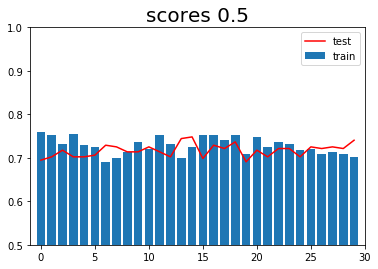

In [173]:
x = [i for i in range(len(scores_train))]
plt.bar(x, scores_train, label = "train")
plt.title('scores ' + str(split), fontsize = 20)
plt.plot(x, scores_test, 'r', label = "test")
plt.axis([-1, 30, 0.5, 1])
plt.legend(loc = 'upper right')

print('min train : ', np.min(scores_train))
print('max train : ', np.max(scores_train))
print('moy train : ', np.mean(scores_train))
print('min test : ', np.min(scores_test))
print('max test : ', np.max(scores_test))
print('moy test : ', np.mean(scores_test))

plt.savefig('output/mon_man/scores' + str(split) + '.png')

In [ ]:
X_monet = shuffle_array(X_monet)
X_manet = shuffle_array(X_manet)

X_monet_train, X_manet_train, X_monet_test, X_manet_test = create_train_test(X_monet, X_manet, 0.1)
X_train = np.concatenate((X_manet_train, X_monet_train))
X_test = np.concatenate((X_manet_test, X_monet_test))

kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto', verbose = 0)
X = X_train[:,:-1]
y = X_train[:,-1]

kmeans.fit(X)

labels = kmeans.labels_
train_score = sum(y==labels)/len(y)
if train_score < 0.5:
    train_score = 1 - train_score
print("train : ", train_score)

X = X_test[:,:-1]
y = X_test[:,-1]

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

test_score = correct/len(X)
if test_score < 0.5:
    test_score = 1 - test_score
print("test : ", test_score)